In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t

In [39]:
invest = pd.read_csv("invest.csv", delimiter=" ")
invest.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


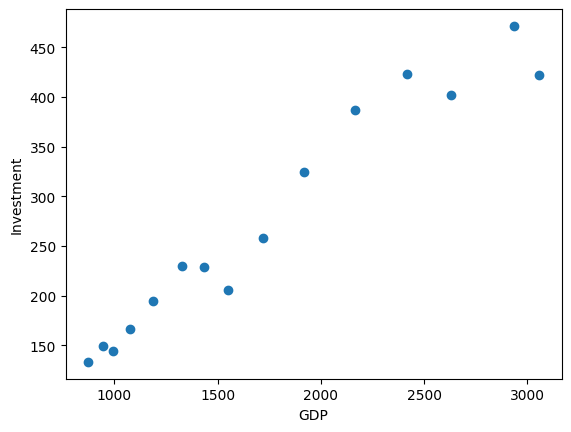

In [40]:
plt.scatter(invest["gnp"], invest["invest"])
plt.xlabel("GDP")
plt.ylabel("Investment")
plt.show()

In [41]:
# log transformation
import numpy as np
invest["gnp_log"] = np.log(invest["gnp"])
invest["invest_log"] = np.log(invest["invest"])
invest.head()

,year,gnp,invest,cpi,interest,gnp_log,invest_log
0,1968,873.4,133.3,82.54,5.16,6.772394,4.892602
1,1969,944.0,149.3,86.79,5.87,6.850126,5.005958
2,1970,992.7,144.2,91.45,5.95,6.900429,4.971201
3,1971,1077.6,166.4,96.01,4.88,6.982492,5.114395
4,1972,1185.9,195.0,100.00,4.50,7.078257,5.273000


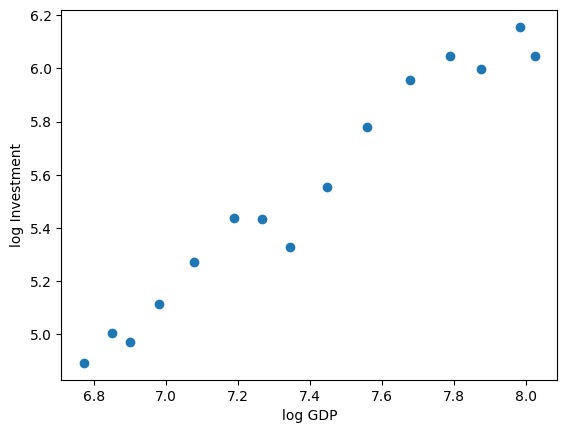

In [42]:
plt.scatter(invest["gnp_log"], invest["invest_log"])
plt.xlabel("log GDP")
plt.ylabel("log Investment")
plt.show()

In [43]:
#  estimating the intercept and the slope :
b1 = np.sum((invest["gnp_log"] - invest["gnp_log"].mean()) * (invest["invest_log"] - invest["invest_log"].mean())) / np.sum((invest["gnp_log"] - invest["gnp_log"].mean()) ** 2)
b0 = invest["invest_log"].mean() - b1 * invest["gnp_log"].mean()

# estimator of sigma squared
sigma2 = np.sum((invest["invest_log"] - b0 - b1 * invest["gnp_log"]) ** 2) / (len(invest["invest_log"]) - 2)

# standard deviation of the intercept and the slope
var_b0 = sigma2 * ((1 / len(invest["invest_log"]) ) + invest["gnp_log"].mean() ** 2 / np.sum((invest["gnp_log"] - invest["gnp_log"].mean()) ** 2))
var_b1 = sigma2 / np.sum((invest["gnp_log"] - invest["gnp_log"].mean()) ** 2)

# printing the results
print("The intercept is: ", b0)
print("The slope is: ", b1)
print("The standard deviation of the intercept is: ", np.sqrt(var_b0))
print("The standard deviation of the slope is: ", np.sqrt(var_b1))

# determination coefficient
R2 = np.sum((b0 + b1 * invest["gnp_log"] - invest["invest_log"].mean()) ** 2) / np.sum((invest["invest_log"] - invest["invest_log"].mean()) ** 2)
print("The determination coefficient is: ", R2)

# Output them in a readable form
print("---------------------------------------------------------------------")
print("The estimated regression line is: invest = ", b0, " + ", b1, " * gnp")
print("The standard deviation of the intercept is: ", np.sqrt(var_b0))
print("The standard deviation of the slope is: ", np.sqrt(var_b1))
print("The determination coefficient is: ", R2)

The intercept is:  -1.9635913352301815
The slope is:  1.015281401598871
The standard deviation of the intercept is:  0.40954727166230726
The standard deviation of the slope is:  0.05538306035485269
The determination coefficient is:  0.9627572956057854
---------------------------------------------------------------------
The estimated regression line is: invest =  -1.9635913352301815  +  1.015281401598871  * gnp
The standard deviation of the intercept is:  0.40954727166230726
The standard deviation of the slope is:  0.05538306035485269
The determination coefficient is:  0.9627572956057854


    4)

    NB : We reject H0 with confidence leve 1-alpha if alpha > p_value

In [44]:
# t_test
t_test = b1 / np.sqrt(var_b1)
print("The t-test is: ", t_test)

# p-value of the slope test 
p_value = (1 - t.cdf(t_test, len(invest["invest_log"]) - 2)) * 2
print("The p-value is: ", p_value)



The t-test is:  18.33198445686672
The p-value is:  1.1363709973011282e-10


    5)

In [45]:
def confidence_interval(gnp = 1000, alpha = 0.1):
    inverstement  = np.exp(b0 + b1 * np.log(gnp))

    # confidence and prediction intervals
    t_quantile = t.ppf(1 - (alpha / 2), len(invest["invest_log"]) - 2)

    n = len(invest["invest_log"])
    # confidence interval
    CI = [b0 + b1*np.log(gnp) - t_quantile * np.sqrt(sigma2) * np.sqrt((1/n) + ( ( np.log(gnp) - invest["gnp_log"].mean())**2 / ( np.sum((invest["gnp_log"] - invest["gnp_log"].mean() )**2)))), b0 + b1*np.log(gnp) + t_quantile * np.sqrt(sigma2) * np.sqrt((1/n) + ( ( np.log(gnp) - invest["gnp_log"].mean())**2 / ( np.sum((invest["gnp_log"] - invest["gnp_log"].mean() )**2))) )]

    # prediction interval
    PI = [b0 + b1*np.log(gnp) - t_quantile * np.sqrt(sigma2) * np.sqrt(1 + (1/n) + ( ( np.log(gnp) - invest["gnp_log"].mean())**2 / ( np.sum((invest["gnp_log"] - invest["gnp_log"].mean() )**2))) ), b0 + b1*np.log(gnp) + t_quantile * np.sqrt(sigma2) * np.sqrt(1 + (1/n) + ( ( np.log(gnp) - invest["gnp_log"].mean())**2 / ( np.sum((invest["gnp_log"] - invest["gnp_log"].mean() )**2))) )]

    return CI, PI, inverstement

CI, PI, inverstement = confidence_interval()
print("The confidence interval is: ", np.exp(CI))
print("The prediction interval is: ", np.exp(PI))
print("The inverstement is: ", inverstement)

The confidence interval is:  [146.67552673 165.87349287]
The prediction interval is:  [132.00238933 184.31167845]
The inverstement is:  155.97942793105494


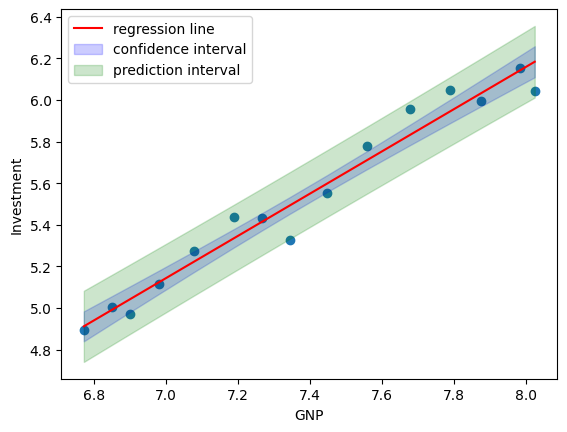

In [46]:
# On a plot with logarithmic axes (GNP as abscissa and Investment as ordinate), plot the data, the estimated regression line, the confidence and prediction intervals for all values of log(GNP) between its minimum and maximum in the data set.

plt.scatter(invest["gnp_log"], invest["invest_log"])
plt.xlabel("GNP")
plt.ylabel("Investment")
# regression line
plt.plot(invest["gnp_log"], b0 + b1 * invest["gnp_log"], color="red", label="regression line")
# confidence intervals
ci0 = []
ci1 = []
pi0 = []
pi1 = []
for x in invest["gnp"]:
    CI, PI, investe = confidence_interval(x, 0.1)
    ci0.append(CI[0])
    ci1.append(CI[1])
    pi0.append(PI[0])
    pi1.append(PI[1])

# plot the intervals
plt.fill_between(invest["gnp_log"], ci0, ci1, color='b', alpha=.2, label="confidence interval")
plt.fill_between(invest["gnp_log"], pi0, pi1, color='g', alpha=.2, label="prediction interval")
plt.legend()
plt.show()

    7 ) 

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = invest["gnp"].values.reshape(-1, 1)
y = invest["invest"].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print("The intercept is: ", reg.intercept_)
print("The slope is: ", reg.coef_)
# for gnp = 1000
print("-------------------------------------------")
print("The investment for GNP = 1000 is: ", reg.predict(np.array([1000]).reshape(-1, 1)))
print("The determination coefficient is: ", r2_score(y, reg.predict(X)))

The intercept is:  [5.02993791]
The slope is:  [[0.15496368]]
-------------------------------------------
The investment for GNP = 1000 is:  [[159.99362149]]
The determination coefficient is:  0.946362204399403


    8)

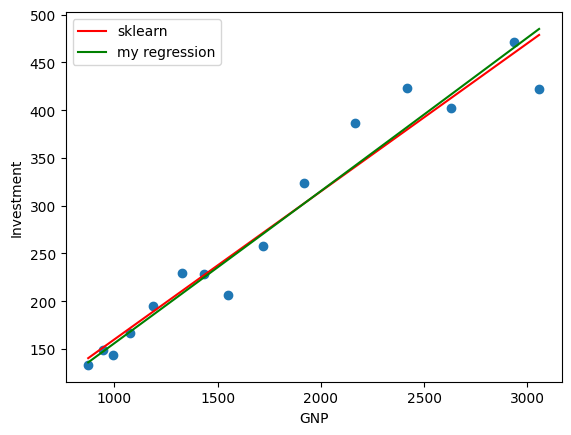

In [48]:
plt.scatter(invest["gnp"], invest["invest"])
plt.xlabel("GNP")
plt.ylabel("Investment")
# sklearn regression line
plt.plot(invest["gnp"], reg.predict(np.array(invest["gnp"]).reshape(-1, 1)), color="red", label="sklearn")
# my regression line
plt.plot(invest["gnp"], np.exp(b0 + b1 * invest["gnp_log"]), color="green", label="my regression")
plt.legend()
plt.show()

    9)

In [51]:
# log transformation of interest
invest["interest_log"] = np.log(invest["interest"])
invest.head()

,year,gnp,invest,cpi,interest,gnp_log,invest_log,interest_log
0,1968,873.4,133.3,82.54,5.16,6.772394,4.892602,1.640937
1,1969,944.0,149.3,86.79,5.87,6.850126,5.005958,1.769855
2,1970,992.7,144.2,91.45,5.95,6.900429,4.971201,1.783391
3,1971,1077.6,166.4,96.01,4.88,6.982492,5.114395,1.585145
4,1972,1185.9,195.0,100.00,4.50,7.078257,5.273000,1.504077


In [65]:
# Gram matrix 

# features matrix
X = np.array([np.ones(len(invest["gnp_log"])), invest["gnp_log"], invest["interest_log"]]).T

G = np.dot(X.T, X)
print("The Gram matrix is: \n",   G)

-------------------------------------------
The Gram matrix is: 
 [[ 15.         110.75282116  29.24044198]
 [110.75282116 820.24847688 217.59802073]
 [ 29.24044198 217.59802073  58.6793618 ]]


In [60]:
# Is the gram matrix full rank ?
print("The rank of the Gram matrix is: ", np.linalg.matrix_rank(G))
print("The Gram matrix is full rank.")

The rank of the Gram matrix is:  3
The Gram matrix is full rank.


    10) For the linear regression of Investment on GNP and Interest, estimate the three regression coefficients and their standard deviations, as well as the determination coefficient for the ordinary least squares. Additionally, test significance of each coefficient using the Student-t test. Report the regression coefficients, corresponding to them p-values, and the determination coefficient in a readable form. Discuss significance of the estimated regression coefficients.

Using the normal equation we can give the values of the three regression coefficients.

In [61]:
# The inverse of the Gram matrix
G_inv = np.linalg.inv(G)

reg_coeffs = np.dot(np.dot(G_inv, X.T), invest["invest_log"])
print("The regression coefficients are: ", reg_coeffs)

The regression coefficients are:  [-2.10518344  1.04664338 -0.0461534 ]


In [64]:
# The standard deviation of the regression coefficients :
sigma2 = np.sum((invest["invest_log"] - reg_coeffs[0] - reg_coeffs[1] * invest["gnp_log"] - reg_coeffs[2] * invest["interest_log"]) ** 2) / (len(invest["invest_log"]) - 3)
print("The estimator of sigma squared is: ", sigma2)

# standard deviation of the intercept and the slope
var_b0 = sigma2 * G_inv[0][0]
var_b1 = sigma2 * G_inv[1][1]
var_b2 = sigma2 * G_inv[2][2]

# printing the results
print("---------------------------------------------------------------------")
print("The estimated regression line is: invest = ", reg_coeffs[0], " + ", reg_coeffs[1], " * gnp + ", reg_coeffs[2], " * interest")
print("The standard deviation of the intercept is: ", np.sqrt(var_b0))
print("The standard deviation of the slope is: ", np.sqrt(var_b1))
print("The standard deviation of the interest is: ", np.sqrt(var_b2))


The estimator of sigma squared is:  0.008223096871434373
---------------------------------------------------------------------
The estimated regression line is: invest =  -2.1051834412530344  +  1.046643377666947  * gnp +  -0.046153397317167055  * interest
The standard deviation of the intercept is:  0.5722761034658185
The standard deviation of the slope is:  0.1026549177932065
The standard deviation of the interest is:  0.12532492393277836


In [85]:

reduced_reg_coeff = reg_coeffs / np.sqrt(np.array([var_b0, var_b1, var_b2]))
print("The reduced regression coefficients are: ", reduced_reg_coeff,", These values are the t-test statistics.")
# Student's t distribution quantile for a 10% risk
t_quantile = t.ppf(1 - (0.1 / 2), len(invest["invest_log"]) - 3)
print("The t-quantile is: ", t_quantile)

# p-values 
print("\n -------------------------------------------")
p_val = 2 * (1 - t.cdf(np.abs(reduced_reg_coeff), len(invest["gnp"])-3))
print("The p-values are: ", p_val)

The reduced regression coefficients are:  [-3.67861497 10.19574513 -0.3682699 ] , These values are the t-test statistics.
The t-quantile is:  1.782287555649159

 -------------------------------------------
The p-values are:  [3.15681643e-03 2.90338757e-07 7.19086465e-01]


In [78]:
# The determination coefficient
R2 = np.sum((reg_coeffs[0] + reg_coeffs[1] * invest["gnp_log"] + reg_coeffs[2] * invest["interest_log"] - invest["invest_log"].mean()) ** 2) / np.sum((invest["invest_log"] - invest["invest_log"].mean()) ** 2)
print("The determination coefficient is: ", R2)

The determination coefficient is:  0.9631735047268832


We can remark that 

    11)